In [3]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset -p "D:\CLASSIFICATION_ALGO"

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown




  0%|          | 0.00/211k [00:00<?, ?B/s]
100%|██████████| 211k/211k [00:00<00:00, 216MB/s]


In [4]:
from zipfile import ZipFile

path = r'D:\classification_algo\sms-spam-collection-dataset.zip'

with ZipFile(path, 'r') as z:
    
    z.extractall()
    
    print('Zip File Extracted')

Zip File Extracted


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [33]:
email_data = pd.read_csv(r'D:\classification_algo\spam.csv', encoding = 'latin1')

In [34]:
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
email_data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)

In [36]:
email_data.columns = ['label', 'message']

In [37]:
email_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
email_data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [39]:
email_data['label'] = email_data['label'].map({'ham' : 0, 'spam' : 1})

In [40]:
email_data['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [41]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [16]:
x =vectorizer.fit_transform(email_data['message'])
y = email_data['label']

In [17]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 73916 stored elements and shape (5572, 8672)>
  Coords	Values
  (0, 3550)	0.1481298737377147
  (0, 8030)	0.22998520738984352
  (0, 4350)	0.3264252905795869
  (0, 5920)	0.2553151503985779
  (0, 2327)	0.25279391746019725
  (0, 1303)	0.24415547176756056
  (0, 5537)	0.15618023117358304
  (0, 4087)	0.10720385321563428
  (0, 1751)	0.2757654045621182
  (0, 3634)	0.1803175103691124
  (0, 8489)	0.22080132794235655
  (0, 4476)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 2048)	0.2757654045621182
  (0, 7645)	0.15566431601878158
  (0, 3594)	0.15318864840197105
  (0, 1069)	0.3264252905795869
  (0, 8267)	0.18238655630689804
  (1, 5504)	0.27211951321382544
  (1, 4512)	0.4082988561907181
  (1, 4318)	0.5236458071582338
  (1, 8392)	0.4316010362639011
  (1, 5533)	0.5465881710238072
  (2, 4087)	0.07917128722158312
  (2, 3358)	0.11301399735581102
  :	:
  (5570, 4218)	0.12246610191126918
  (5570, 8313)	0.18723687600522523
  (5570, 1084

In [46]:
x_train, x_test, y_train, y_test = train_test_split(email_data['message'], email_data['label'], stratify = y, test_size = 0.2, random_state = 2)

In [47]:
vectorizer.fit(x_train) 

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [48]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [49]:
model = SVC(kernel = 'linear')

In [50]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
y_predict = model.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_predict))

0.9838565022421525


<Axes: >

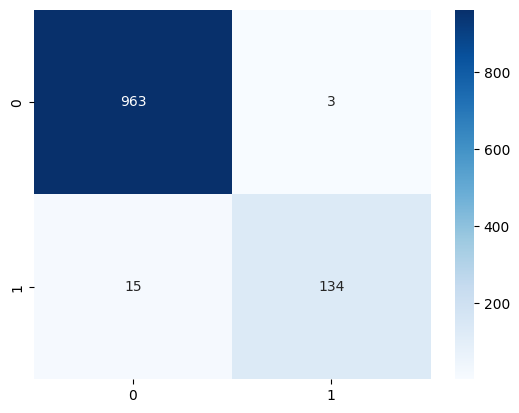

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
con = confusion_matrix(y_test, y_predict)
sns.heatmap(con, cmap = 'Blues', annot = True, fmt = 'g')


In [55]:
sample_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/claim",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your mobile number has been selected for a £500 prize. Call 09061701461 now.",
    "Can you send me the notes from class?",
    "You have been pre-approved for a loan up to $50,000. Apply now!"
]

X_new = vectorizer.transform(sample_messages)

Predictions = model.predict(X_new)

for message, result in zip(sample_messages ,Predictions) :

    if result == 1 :
        
        print(f"\"{message}\" : spam message")
    
    else :
        
        print(f"\"{message}\" : Is Not Spam message")

"Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/claim" : spam message
"Hey, are we still meeting for lunch today?" : Is Not Spam message
"URGENT! Your mobile number has been selected for a £500 prize. Call 09061701461 now." : spam message
"Can you send me the notes from class?" : Is Not Spam message
"You have been pre-approved for a loan up to $50,000. Apply now!" : spam message
